<a href="https://colab.research.google.com/github/sonika-07/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **1. Importing libraries**

In [59]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [60]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Loading the Play store dataset**

In [61]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = "ISO-8859-1")

## **3. Dataset OverView**

In [62]:
# Dataset First Look
df.head()          #Top 5 rows 

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [63]:
df.tail()   #bottom 5 rows

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30-11-2018               1003    19              4.2           34   
8756  30-11-2018                764    20              3.4           37   
8757  30-11-2018                694    21              2.6           39   
8758  30-11-2018                712    22              2.1           41   
8759  30-11-2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [64]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

There are 14 features in our dataset including one dependent feature.

### Dataset Information

In [65]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [66]:
# Dataset Duplicate Value Count
print(len(df[df.duplicated()]))

0


There are no duplicate entries.

Let's see the count of each date.

In [67]:
#count of each date
df.Date.value_counts()

01-12-2017    24
09-08-2018    24
07-08-2018    24
06-08-2018    24
05-08-2018    24
              ..
31-03-2018    24
30-03-2018    24
29-03-2018    24
28-03-2018    24
30-11-2018    24
Name: Date, Length: 365, dtype: int64

Here we have Dataset of one year with 24 hours.
let's see if we have more than 24 hrs of any day.

In [68]:
#see the unique values of hour
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

So here we have data of 24 hrs of each day of the year.

#### Missing Values/Null Values

In [69]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

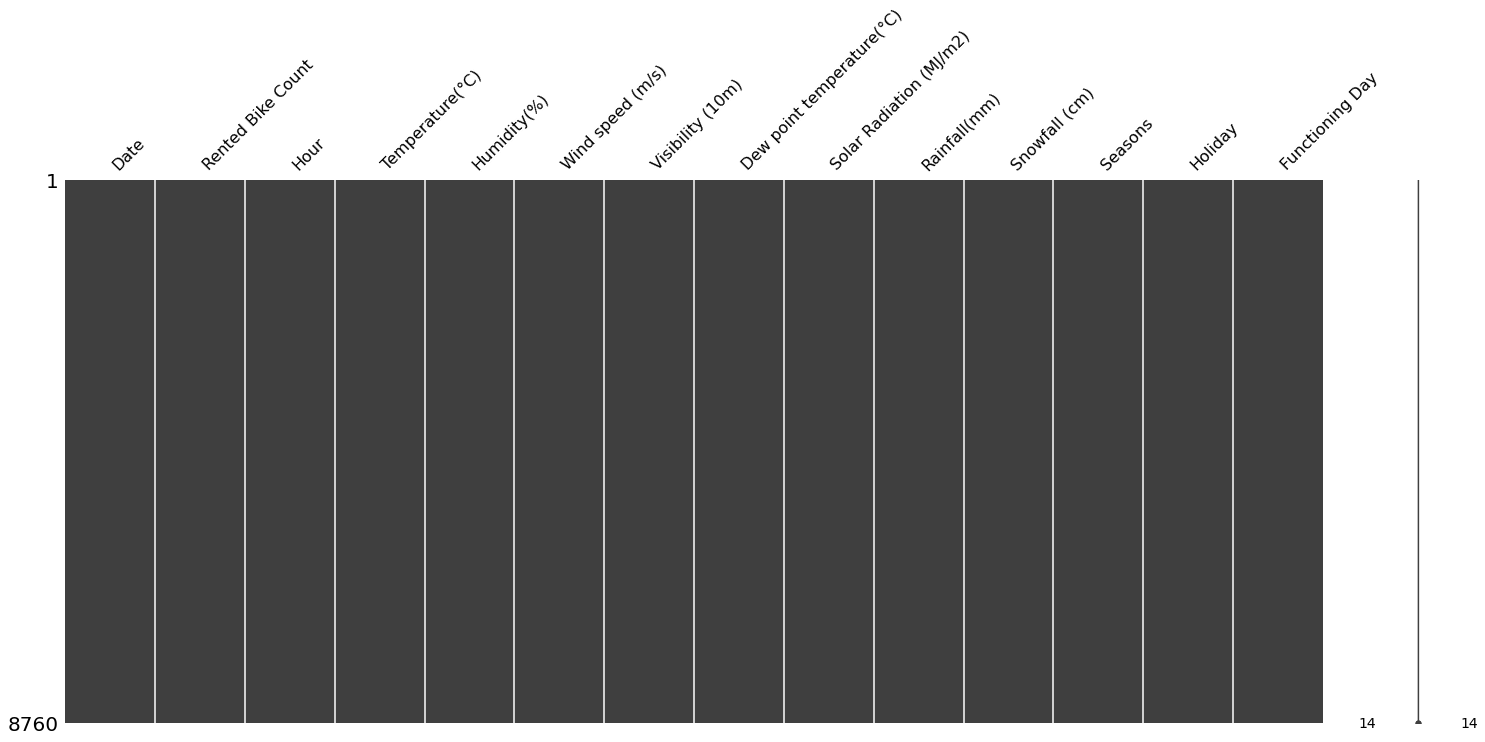

In [70]:
# Visualizing the missing values
import missingno as msno
msno.matrix(df)

We can see that there are no missing values in our dataset

## **4. Understanding Variables**

In [71]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Here 'Rented Bike Count' is our dependent variable.

In [72]:
# Dataset Describe
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01-12-2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

All the statistical information is available for each variable.

We have 3 categorical columns. Let's find out unique values for each categorical column.

### Check Unique Values for each categorical variable.

In [73]:
# Checking Unique Values for seasons
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [74]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

There are four seasons in a year and for each season the dataset is available.

In [75]:
## Checking Unique Values for holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [76]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

There are two unique values for holiday column : Holiday or No Holiday
8328 data is no holiday, i.e., 347days while 432 data is holiday, i.e., 18 days.

In [77]:
# Checking Unique Values for functionig day
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [78]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Two unique values for Functioning day.

## 5. **Data Wrangling**

### 5.1 Changing the 'Date' data type to datetime

In [79]:
df['Date']= pd.to_datetime(df['Date'])

###5.2 Creating column for number of month and find if it's weekend or not 

In [80]:
#extracting month and weekend
df['month'] = df['Date'].apply(lambda x : x.month)         #extracting month
df['day_of_week'] = df['Date'].dt.day_name()               #extracting day of week
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )     #extracting weekend
df=df.drop(columns=['Date','day_of_week'],axis=1)          #droping Date and Day of week because we won't be using these columns.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

Hour, Month and Weekdays_weekend is by default having numerical datatypes but these are timestamp. hence these columns must be categorical columns

In [82]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# convert Month column integer to Categorical 
df['month']=df['month'].astype('object')

# convert weekdays_weekend column integer to Categorical 
df['weekdays_weekend']=df['weekdays_weekend'].astype('object')

Other columns do not require changes. So let's proceed.

##**6. Exploratory Data Analysis**

In [83]:
#list of numerical column
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

###6.1 Univariate Analysis

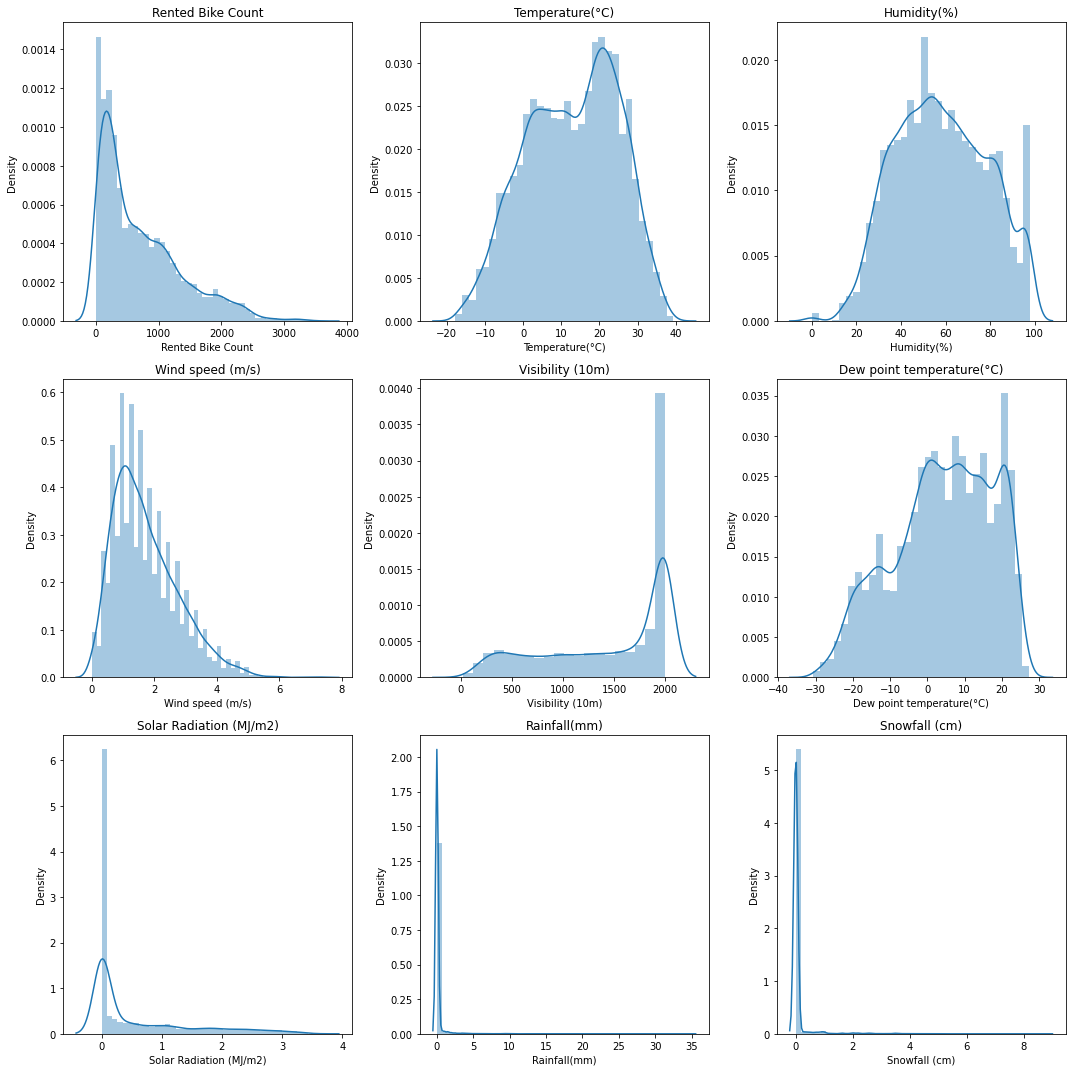

In [84]:
#Distribution plot
n=1
plt.figure(figsize=(15,15))
for col in num_col:
   plt.subplot(3,3,n)
   n+=1
   sns.distplot(df[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

Here it is clearly visible that some of the columns are not normally distributed.These are: ['Rented Bike Count',  'Wind speed (m/s)', 'Visibility (10m)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']. These columns have skewed distribution.

Let's check if mean and median are on same axis or not.

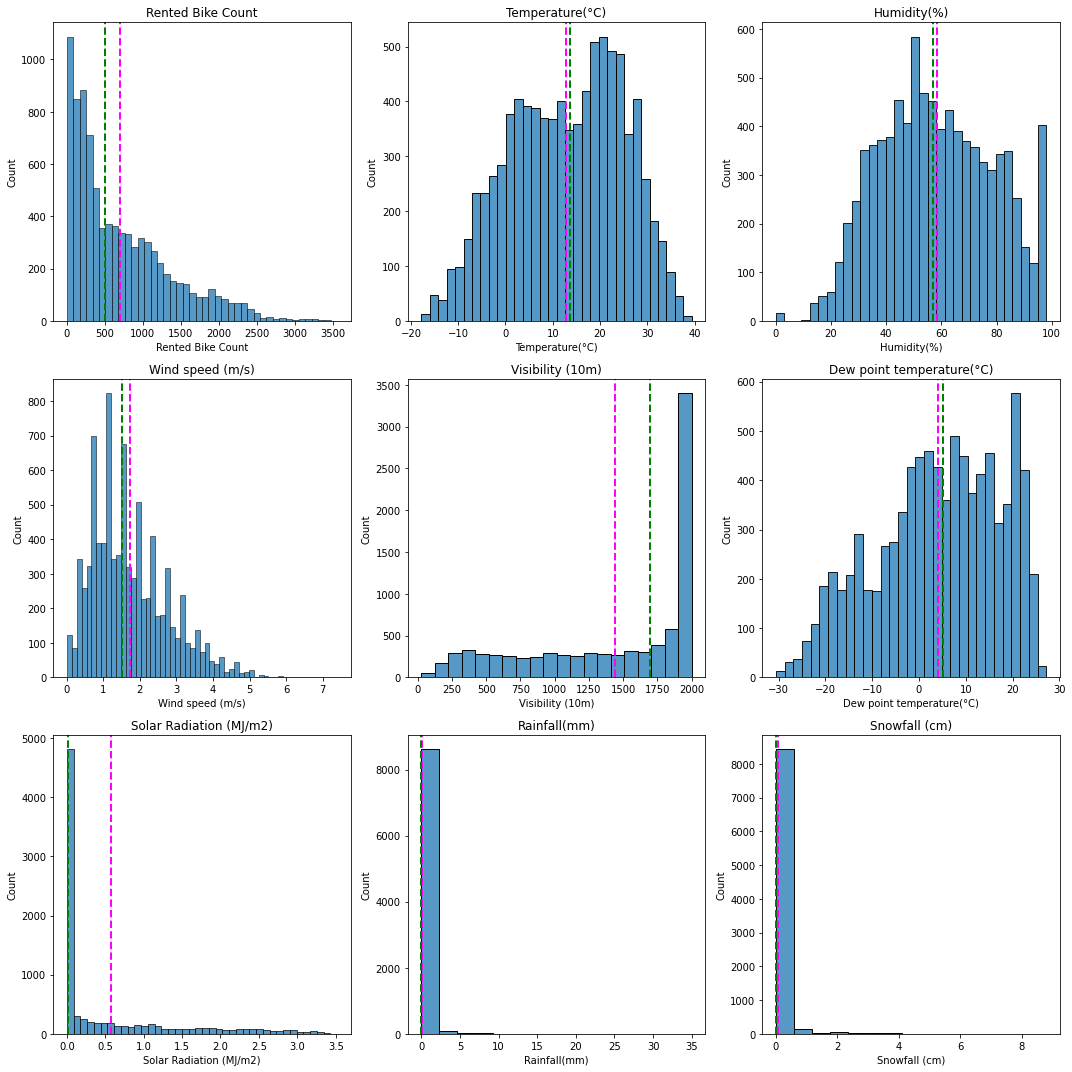

In [85]:
#Histogram
n=1
plt.figure(figsize=(15,15))
for col in num_col[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2) 
  plt.title(col)
  plt.tight_layout()  

Rented bike count which is dependent variable is positively skewed.
'Wind speed (m/s)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)' which is independent variables are also positively skewed and 'Visibility (10m)' is also IDV which is negatively skewed.

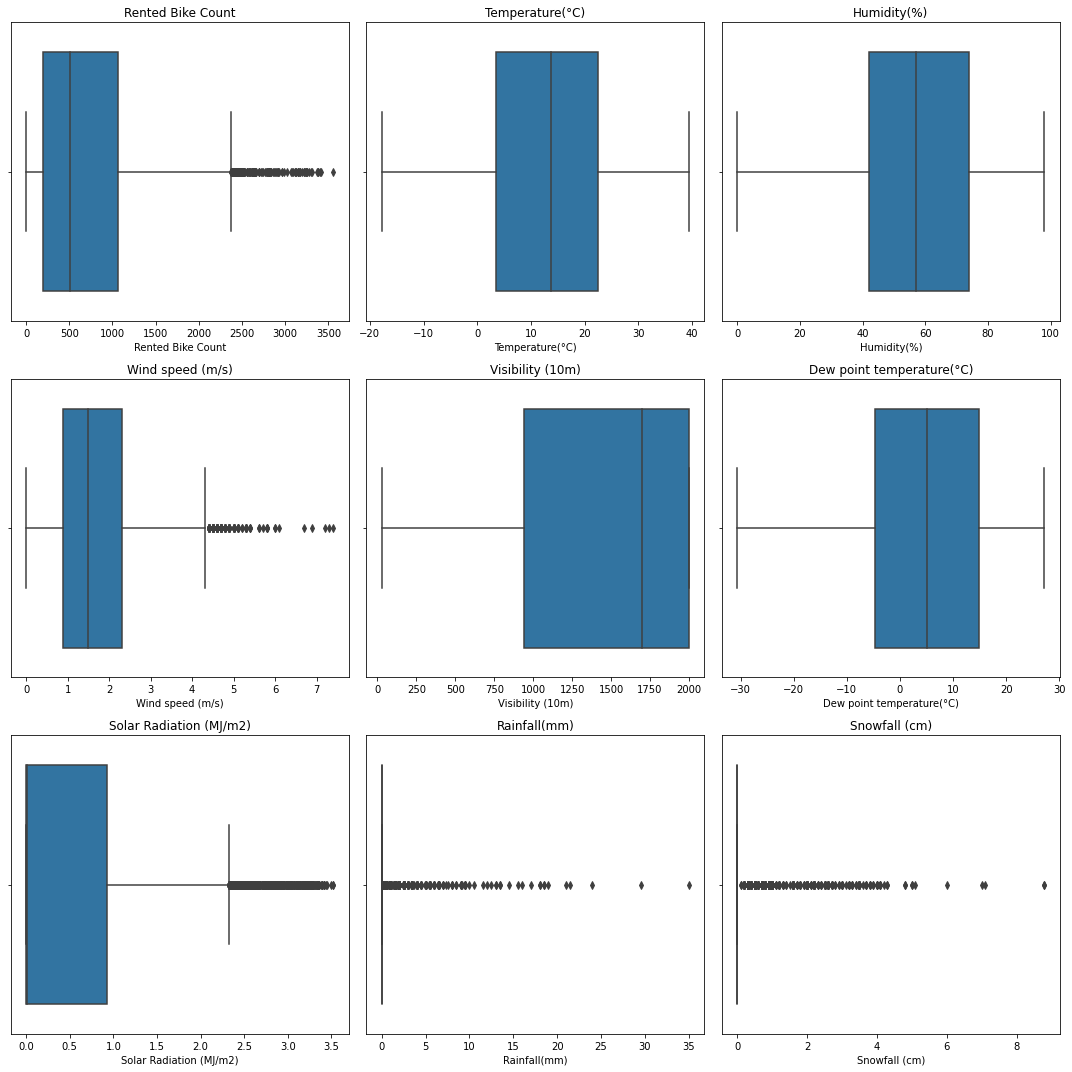

In [86]:
#Boxplot
#Checking for outliers
n=1
plt.figure(figsize=(15,15))
for col in num_col[:]:
  plt.subplot(3,3,n)
  n+=1
  sns.boxplot(df[col])
  plt.title(col)
  plt.tight_layout()  

Outliers present in some columns. These are:

[ 'Rented Bike Count' , 'Wind speed (m/s)' , 'Solar Radiation (MJ/m2)' , 'Rainfall(mm)' , 'Snowfall (cm)']

We don't need to change outliers column.

###4.2 Bivariate analysis

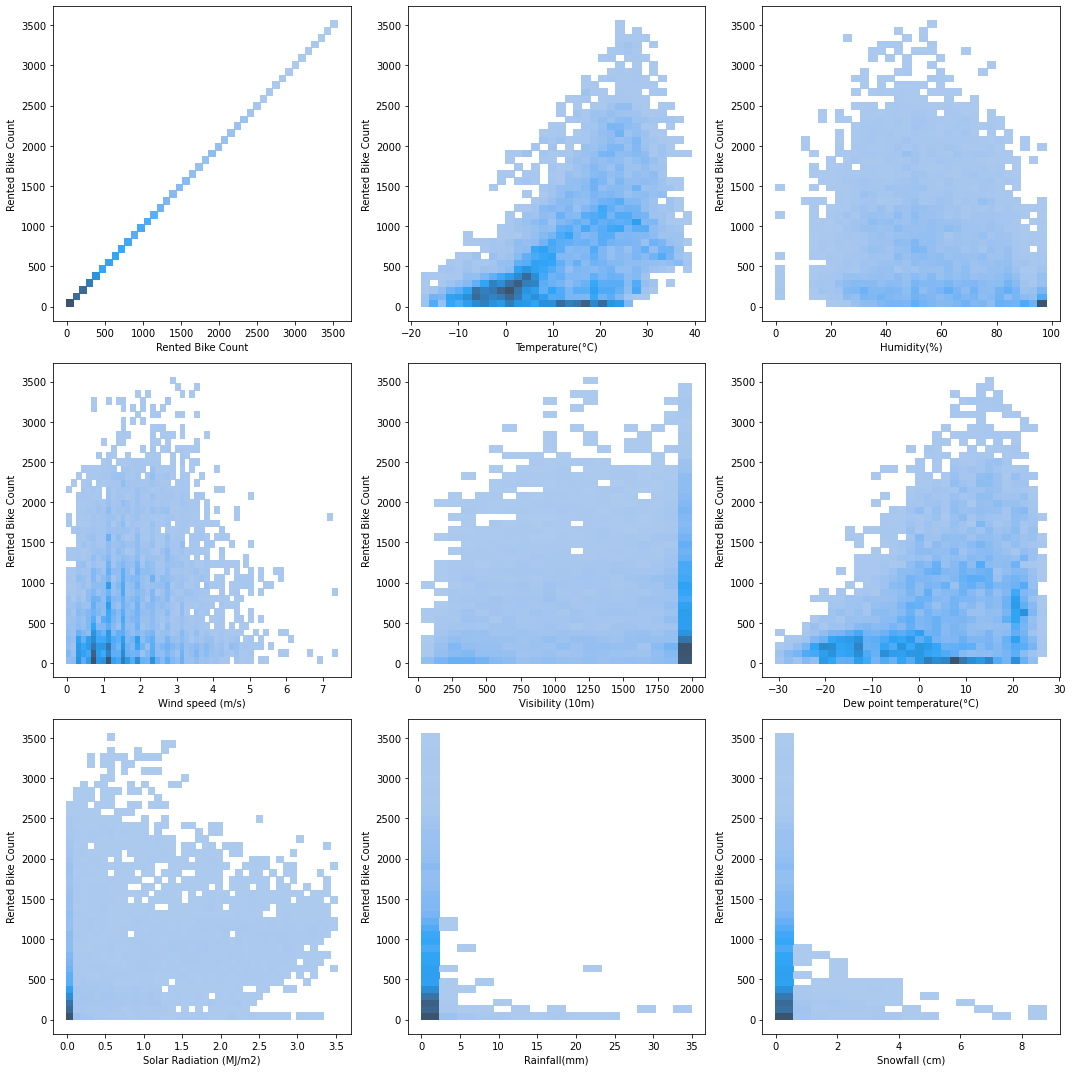

In [87]:
#hist plot
n=1
plt.figure(figsize=(15,15))
for col in num_col:
  plt.subplot(3,3,n)
  n+=1
  sns.histplot(x=col,y='Rented Bike Count',data=df)
  plt.tight_layout()


Wecannot infer any useful information. Hence let's plot regression line.

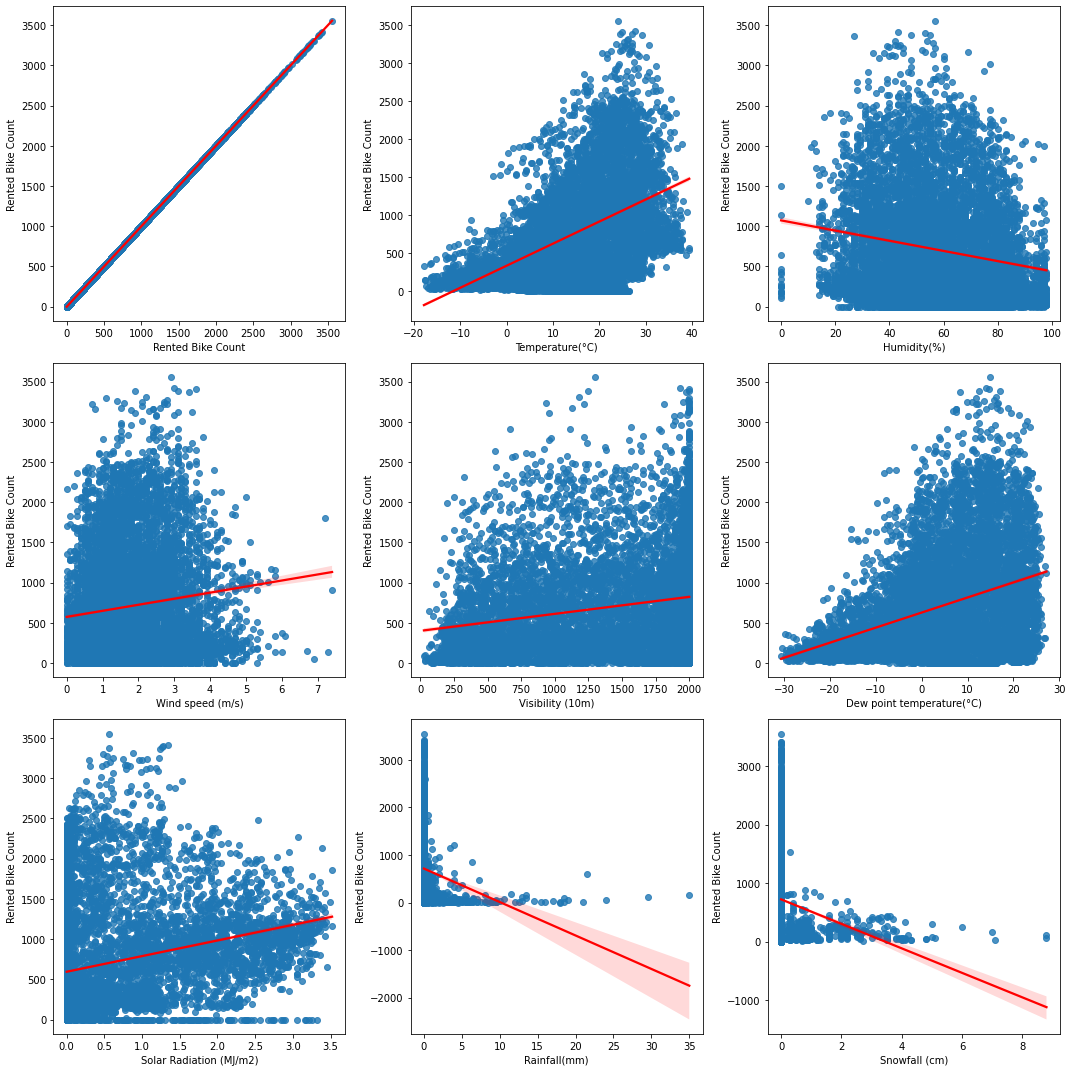

In [88]:
#Plotting the regression line
n=1
plt.figure(figsize=(15,15))
for col in num_col:
  plt.subplot(3,3,n)
  n+=1
  sns.regplot(x=col,y='Rented Bike Count',data=df,line_kws={"color": "red"})
  plt.tight_layout()

Here some of the variables have positive effect on dependent variable while some have negative impact.

In [89]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

###Which month have the most demand for rented bike count?


In [90]:
#Month v/s bike demand 
month_count=pd.DataFrame(df.groupby(by='month',as_index=False)['Rented Bike Count'].sum())
month_count

month  Rented Bike Count
0       1             287244
1       2             264112
2       3             455037
3       4             556219
4       5             665948
5       6             706728
6       7             691339
7       8             614190
8       9             499326
9      10             626988
10     11             493412
11     12             311771

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

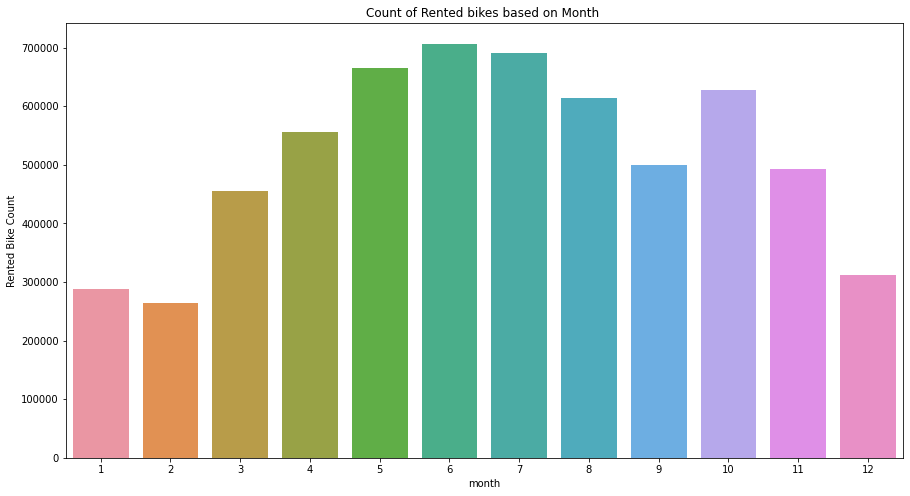

In [91]:
#visual analysis of month and rented bike count
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=month_count,x='month',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes based on Month ')

The demand for rented bike count is highest in the month of May, June, July and lowest in the month of December, January, February.

###Demand of rented bikes for different seasons

In [92]:
#season v/s rented bike
season_count=pd.DataFrame(df.groupby(by='Seasons',as_index=False)['Rented Bike Count'].sum()) 
season_count

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

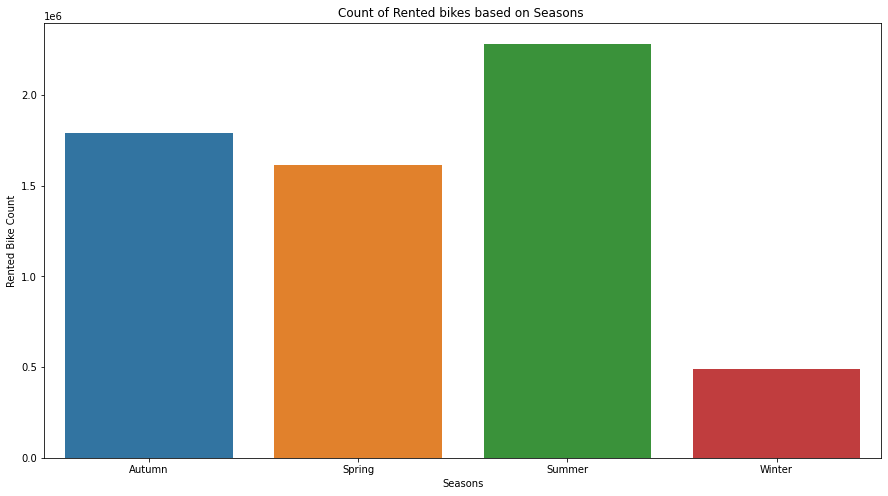

In [93]:
# visualization through bar graph
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=season_count,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes based on Seasons ')

The demand for rented bike is high in summer season while the demand for rented bike is low in winter season.

It means that people like to have bike ride in convincing season.

###Average count of rented bike in each hour

In [94]:
avg_hr=pd.DataFrame(df.groupby(by='Hour',as_index=False)['Rented Bike Count'].mean())
avg_hr

Hour  Rented Bike Count
0      0         541.460274
1      1         426.183562
2      2         301.630137
3      3         203.331507
4      4         132.591781
5      5         139.082192
6      6         287.564384
7      7         606.005479
8      8        1015.701370
9      9         645.983562
10    10         527.821918
11    11         600.852055
12    12         699.441096
13    13         733.246575
14    14         758.824658
15    15         829.186301
16    16         930.621918
17    17        1138.509589
18    18        1502.926027
19    19        1195.147945
20    20        1068.964384
21    21        1031.449315
22    22         922.797260
23    23         671.126027

<Figure size 1080x720 with 0 Axes>

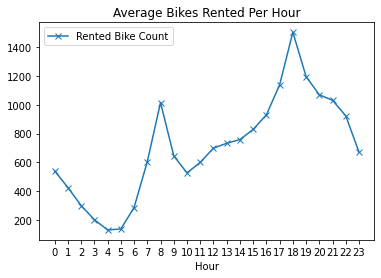

In [95]:
#visualizing through line plot
plt.figure(figsize=(15,10))
a=avg_hr.plot(x='Hour',y='Rented Bike Count',legend=True,title="Average Bikes Rented Per Hour",marker='x')
a.set_xticks(range(len(avg_hr)))
#a.set_xticklabels(avg_hr.index.tolist(), rotation=85)

###conclusion

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

we can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

###Effect of weekends on demand of bike

In [96]:
#apps with content rating
weekend_count=pd.DataFrame(df.groupby('weekdays_weekend')['Rented Bike Count'].sum())
weekend_count=weekend_count.reset_index()
weekend_count.columns=['Weekend','count']
weekend_count

Weekend    count
0        0  4462544
1        1  1709770

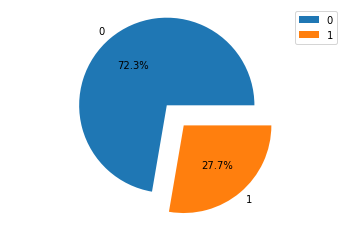

In [97]:
#visualizing through pie chart
labels=weekend_count['Weekend']
sizes=weekend_count['count']
myexplode = [ 0,0.3]
plt.pie(sizes,labels=labels,explode=myexplode,autopct='%1.1f%%')
plt.axis('equal')
plt.legend()
plt.show()

Rented bikes are approximately 30% used by riders on weekends.
now find out rented bikes count if weekend was holiday or not. 

In [98]:
# creating table to see for rented bike in weekend holidays
weekend_holiday_count=pd.DataFrame(df.groupby(['weekdays_weekend','Holiday'],as_index=False)['Rented Bike Count'].sum())
df_count=weekend_holiday_count.pivot('weekdays_weekend','Holiday',	'Rented Bike Count').fillna(0).reset_index()
df_count

Holiday  weekdays_weekend  Holiday  No Holiday
0                       0   156931     4305613
1                       1    58964     1650806

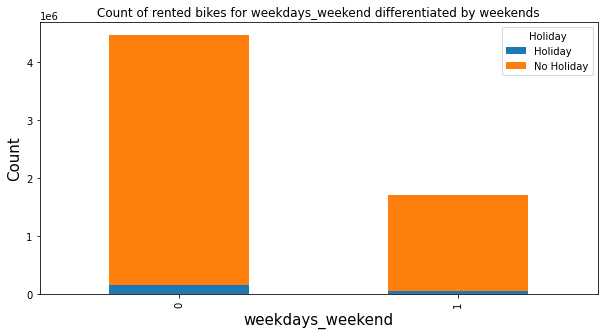

In [99]:
# Visualizing through stacked bar chart
df_count.set_index('weekdays_weekend').plot(kind='bar', stacked=True, figsize=(10,5))
plt.xlabel("weekdays_weekend", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of rented bikes for weekdays_weekend differentiated by weekends")
plt.show()

Rented bikes are mostly used in non weekend. During holidays on weekends people generally do not use much rented bikes.

Which means that people generally use rented bike for travelling to office.

###4.2 Multivariate analysis

###Correlation

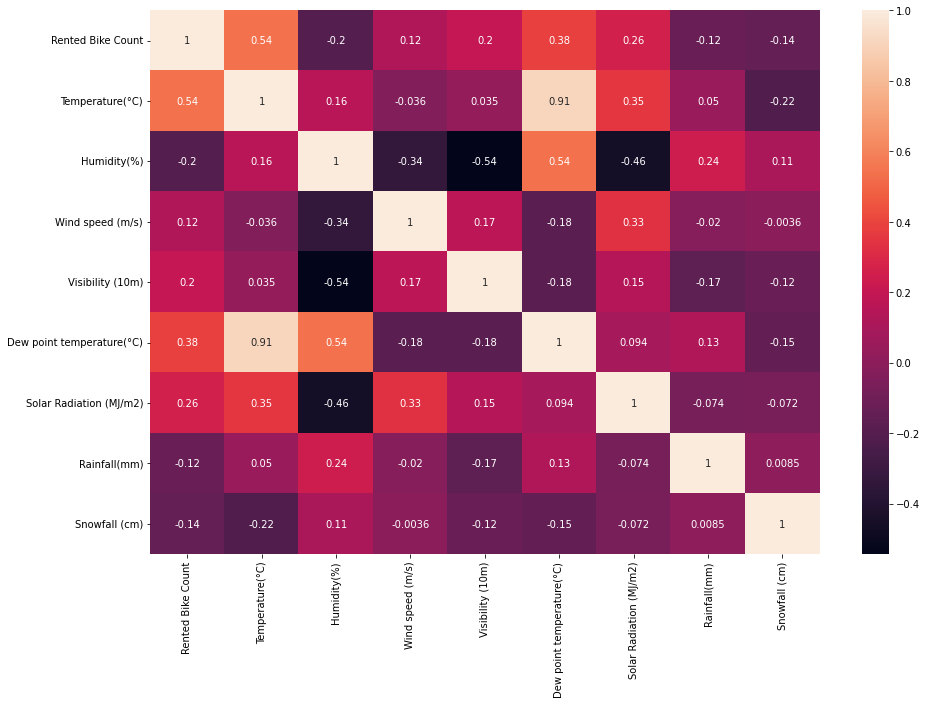

In [100]:
# Checking the correlation among variables
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

There is high correlation between Dew point temperature and Temperature , i.e., 0.91

### Pairplot

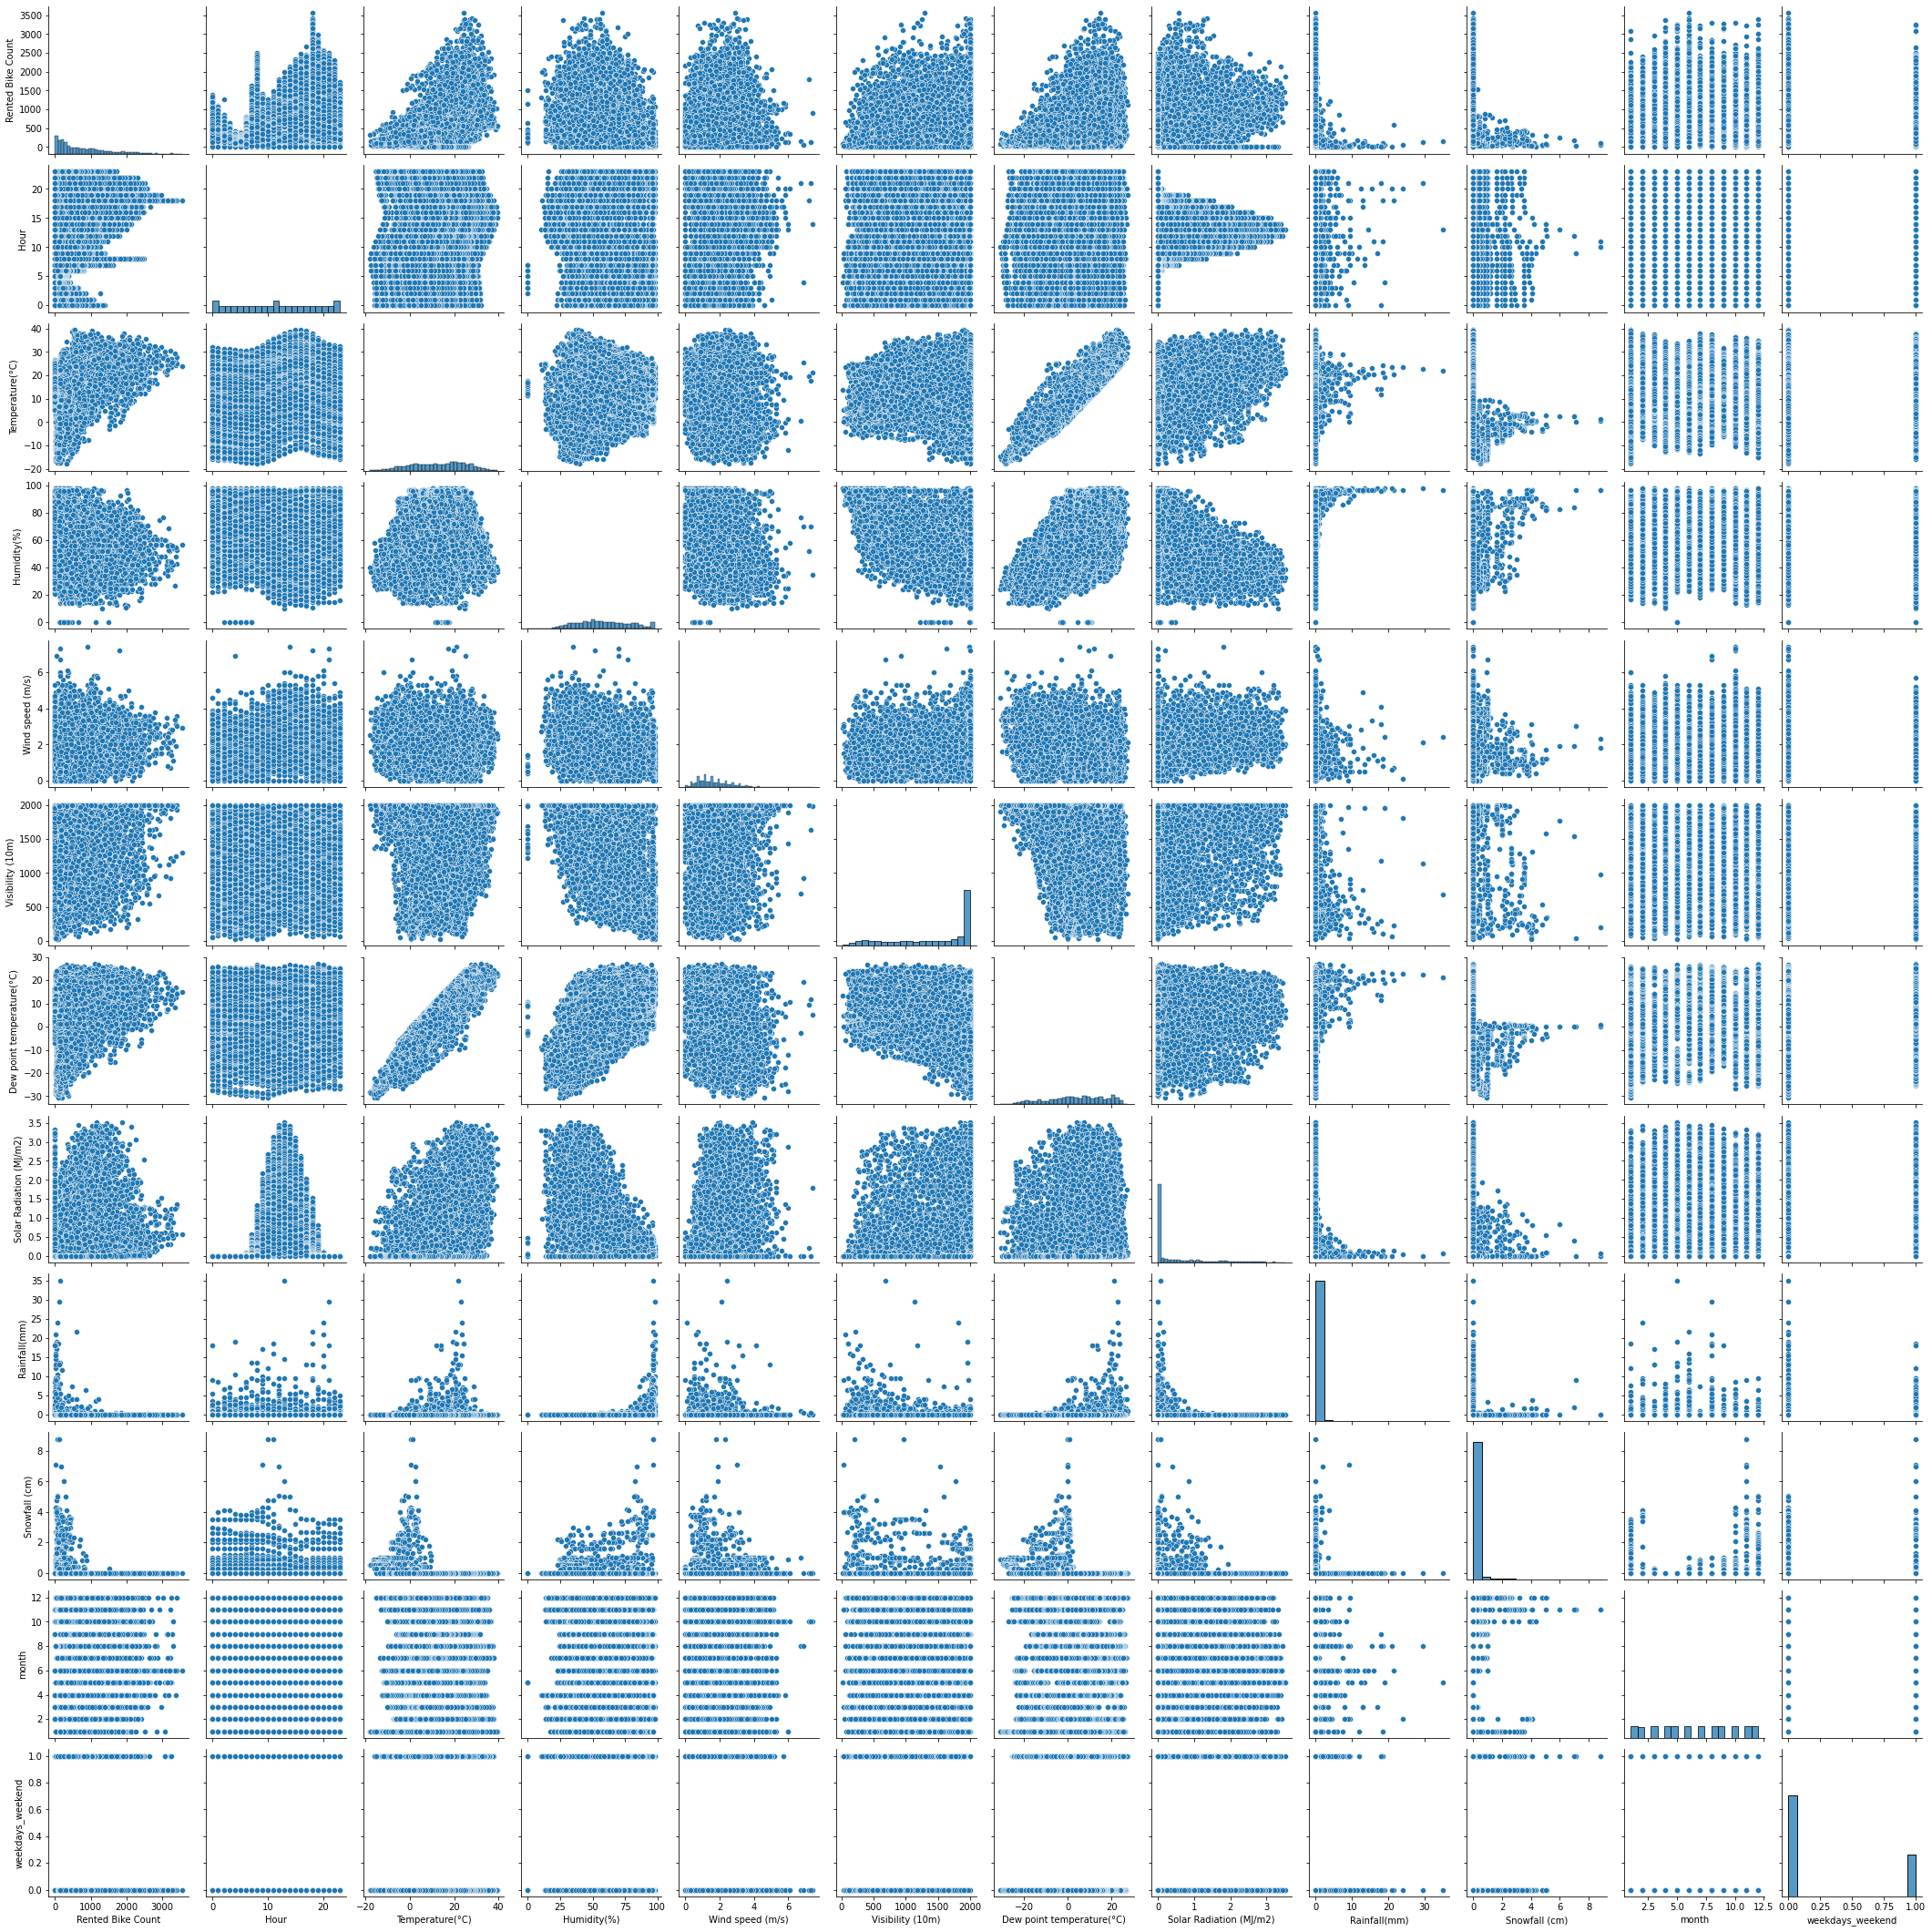

In [101]:
# Pair Plot visualization 
sns.pairplot(df)

##**Multicollinearity**

In [102]:
# function to calculate Multicollinearity

'''Multicollinearity means there is any relationship between independent variables.
If it is so, then linear model may not give useful results. Hence it needs to be removed.'''

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
# multicollinearity result

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

Here the Variance Inflation factor score of Temreature and Dew point temperature is greater that 5. And seeing the correlation matrix, there is high correlation between Temreature and Dew point temperature (0.91). Hence we have to drop one feature.


So let's drop Dew point temperature. and again checking for VIF, we find:

In [103]:
# copying the original data to new dataframe
new_df=df.copy()

In [104]:
#dropping the 'Dew point temperature'
df.drop('Dew point temperature(°C)',axis=1,inplace=True)

In [105]:
#Checking for Multicollinearity after dropping a column
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

Now there is no multicollinearity in my data.

Now to use categorical feature for modelling, we use label encoding.

##**Encoding**

In [106]:
cat_col= ['Seasons', 'Holiday','Functioning Day']
''' Since Month, Hour, weekdays_weekend is already encoded.'''

' Since Month, Hour, weekdays_weekend is already encoded.'

In [107]:
# lable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    df[col]= le.fit_transform(df[col])

In [108]:
df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Seasons  Holiday  Functioning Day month weekdays_weekend  
0        3        1                1     1                0  
1        3        1                1     1                0  
2        3        1                1     1                0  
3        3        1                1     1                0  
4        3        1                1     1                0

In [109]:
df.Holiday.value_counts()

1    8328
0     432
Name: Holiday, dtype: int64

###**Transformations**

In order to fullfill linear regression assumption that dependent variable must be normally distributed.

In [110]:
new_df=df.copy()
new_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'month', 'weekdays_weekend'],
      dtype='object')

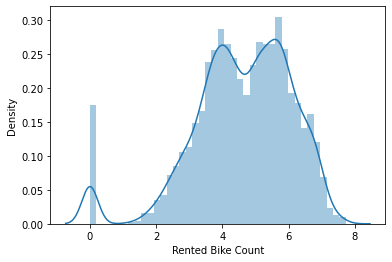

In [180]:
#let's see the distribution of transformed column
sns.distplot(np.sqrt(new_df['Rented Bike Count']))
plt.show()

After applying square root transformation , 'Rented Bike Count' is now approximately normally distributed. Hence we'll use this transformation for dependent variable.

###**Splitting data**

In [113]:
# splitting data in X and y
X = df.drop(columns=['Rented Bike Count'])
y = np.sqrt(df['Rented Bike Count'])

In [114]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [115]:
#let's see how many data values are there in my X_train,X_test,y_train,y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 13), (2190, 13), (6570,), (2190,))

In [116]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8639   23              3.8           83               1.1               390   
3614   14             24.0           47               2.3               520   
1387   19             -7.1           33               2.0              1887   
3900   12             12.3           97               0.8               238   
8044    4              3.6           70               0.8              1934   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
8639                     0.00           0.0            0.4        0        1   
3614                     2.87           0.0            0.0        1        1   
1387                     0.00           0.0            0.0        3        1   
3900                     0.14           2.0            0.0        1        1   
8044                     0.00           0.0            0.0        0        1   

      Functioning Day month weekdays_weekend  
8639                1    11                1  
3614                1     4                0  
1387                1     1                1  
3900                1    12                0  
8044                1     1                0

In [117]:
y_train.head()

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
Name: Rented Bike Count, dtype: float64

In [118]:
#scaling data
'''using standardization beacuase if there are outliers in the data, they will not be affected by standardization.'''
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [119]:
#creating function to fit Linear regression, Rigde Regression, Lasso regression

def LR_model(model,X_train,X_test,y_train,y_test):
 #fitting
 model.fit(X_train,y_train)

 #see the coefficients
 print('coefficients:',model.coef_)
 print('intercept:',model.intercept_)

 #predicting train and test values
 y_pred=model.predict(X_test)

 #calculating different scores

 train_score=pd.DataFrame()
 test_score=pd.DataFrame()

 # 1. Mean squared error
 MSE=mean_squared_error(y_test**2,y_pred**2)
 print('MSE:',MSE)

 # 2. Root mean squared error
 RMSE= np.sqrt(MSE)
 print("RMSE :",RMSE)

 # 3. r2 score
 r2=r2_score(y_test**2,y_pred**2)
 print("R2 :",r2)

 # 4. Mean absolute error
 MAE=mean_absolute_error(y_test**2,y_pred**2)
 print("MAE :",MAE)

 # 5. adjusted r2
 adj_r2=(1-(1-r2_score(y_test**2, y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
 print("adj_r2 :",adj_r2)

 #creating dictionary to store different score values
 dict1={'Model':model,
        'MAE':round((MAE),4),
       'MSE':round((MSE),4),
       'RMSE':round((RMSE),4),
       'R2':round((r2),4),
       'Adj_R2':round((adj_r2 ),4)
       }
 return pd.DataFrame(dict1,index=[1])


##fitting simple multiple linear regression

In [120]:
#importing
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [121]:
#FITTING WITH SCALING
score_lr=LR_model(LR,X_train,X_test,y_train,y_test)

coefficients: [ 3.31380289  6.63836309 -3.15317925  0.06576923  0.23383534 -0.81475412
 -1.70019258  0.01990779 -2.25561277  0.68452747  4.95061288  0.40614858
 -0.35251692]
intercept: 23.534127039443128
MSE: 175064.39932445713
RMSE : 418.4069781020115
R2 : 0.5802917547374289
MAE : 280.5766084032476
adj_r2 : 0.5777843065809889


In [122]:
score_df=score_lr
score_df

Model       MAE          MSE     RMSE      R2  Adj_R2
1  LinearRegression()  280.5766  175064.3993  418.407  0.5803  0.5778

##checking for assumptions

In [123]:
y_pred=LR.predict(X_test)

In [124]:
# calculating residuals
residual = y_test - y_pred

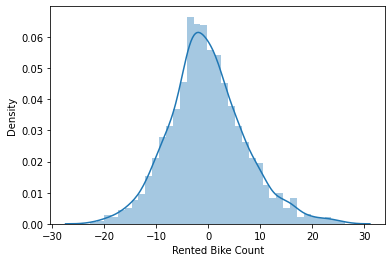

In [125]:
#distribution plot of residuals
sns.distplot(residual)

Since residuals are normally distributed. Hence it is satisfying the assumption.

((array([-3.417104  , -3.16774281, -3.02952782, ...,  3.02952782,
          3.16774281,  3.417104  ]),
  array([-22.63181772, -21.76237274, -21.18890227, ...,  25.90827484,
          26.06726104,  26.34373993])),
 (7.324488835266065, -0.22147125074820082, 0.9951205712898514))

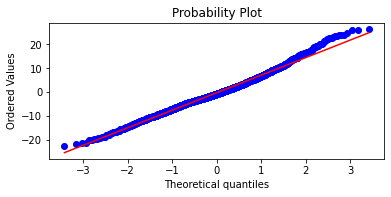

In [126]:
#probability plot
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)

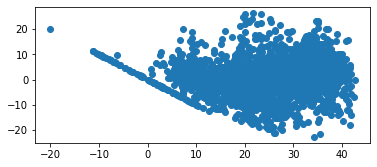

In [127]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_pred, residual)

Since we cannot see any bell shape or fan shape curve. Hence there is no heteroscedacidity.

##Function to plot actual v/s predicted value

In [128]:
# ploting the line graph of actual and predicted values
def plot_(y_test,y_pred):  
 plt.figure(figsize=(20,10))
 plt.plot((y_pred)[:100])
 plt.plot((np.array(y_test)[:100]))
 plt.legend(["Predicted","Actual"])
 plt.show()

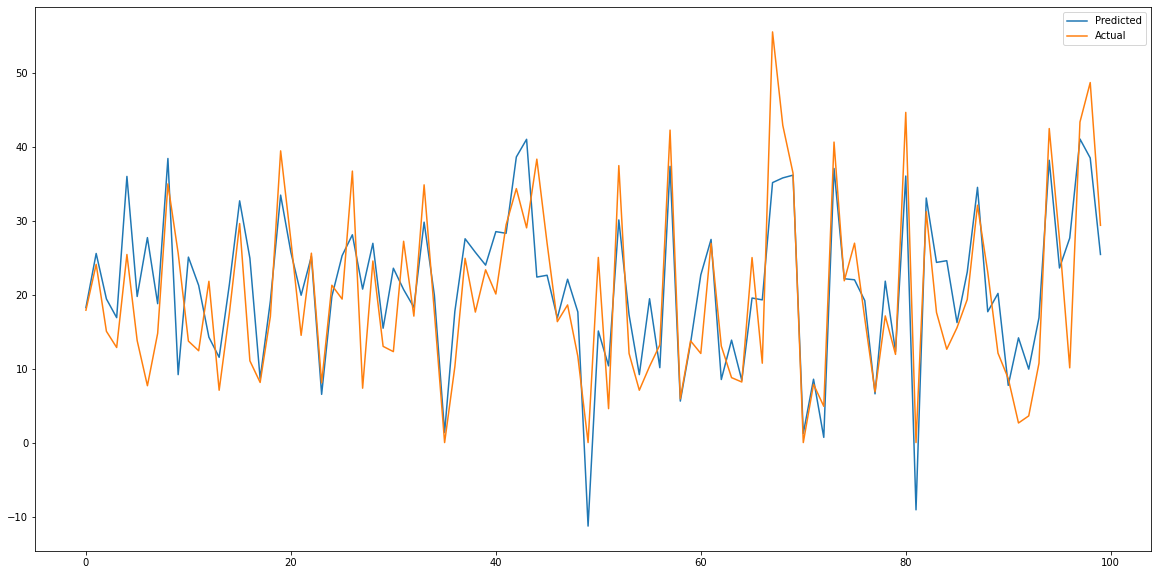

In [129]:
plot_(y_test,y_pred)

#Ridge regression

In [130]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#creating instance for ridge
ridge=Ridge()

#hyperparameter tuning
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [131]:
#fitting model
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55,
                                   60, 100, 0.5, 1.5, 1.6, 1.7, 1.8, 1.9]},
             scoring='neg_mean_squared_error')

In [132]:
#FIND BEST PARAMETER
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 5}
-54.1914829389122


In [133]:
#fITTING RIDGE REGRESSION WITH BEST PARAMETER
ridge = Ridge(alpha = 5)
score_ridge=LR_model(ridge,X_train,X_test,y_train,y_test)


coefficients: [ 3.31349948  6.62825933 -3.14292073  0.06528717  0.2382574  -0.80625346
 -1.69939895  0.0176466  -2.25402996  0.68440353  4.94641748  0.40610293
 -0.35240279]
intercept: 23.534127039443128
MSE: 175136.84254139705
RMSE : 418.49353942611475
R2 : 0.5801180757051393
MAE : 280.6015584910022
adj_r2 : 0.5776095899441867


In [134]:
score_df=score_df.append(score_ridge)

In [135]:
score_df

Model       MAE          MSE      RMSE      R2  Adj_R2
1  LinearRegression()  280.5766  175064.3993  418.4070  0.5803  0.5778
1      Ridge(alpha=5)  280.6016  175136.8425  418.4935  0.5801  0.5776

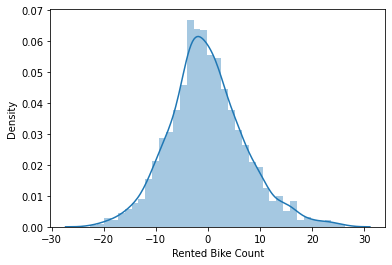

In [136]:
y_pred=ridge.predict(X_test)
residual=y_test-y_pred
sns.distplot(residual)

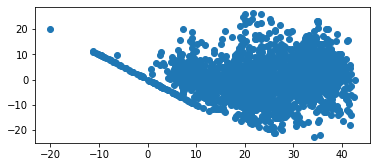

In [137]:
#Homoscedasticity
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_pred, residual)

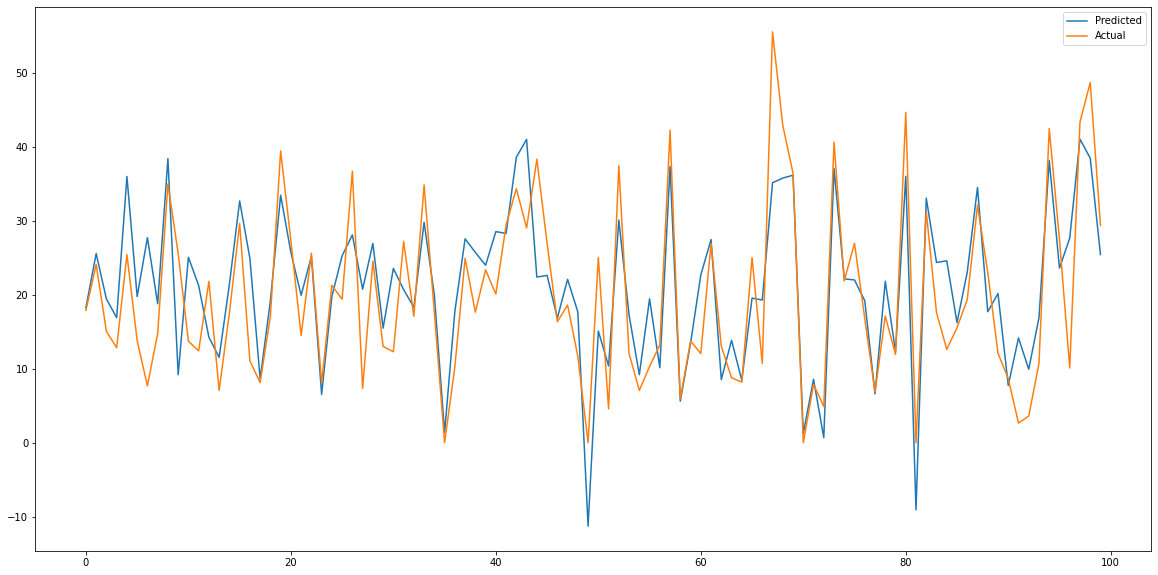

In [138]:
# ploting the line graph of actual and predicted values
plot_(y_test,y_pred)

#Lasso regression

In [139]:
from sklearn.linear_model import Lasso

#creating an instance for Lasso
lasso=Lasso()

In [140]:
#finding the best parameter
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_grid=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [141]:
#fitting model
lasso_grid.fit(X_train,y_train)
print(lasso_grid.best_params_)
print(lasso_grid.best_score_)

{'alpha': 0.001}
-54.19144266293879


In [142]:
#fITTING LASSO REGRESSION WITH BEST PARAMETER
lasso = Lasso(alpha = 0.001)
score_lasso=LR_model(lasso,X_train,X_test,y_train,y_test)

coefficients: [ 3.3137878   6.6352789  -3.14980791  0.06421265  0.23434857 -0.810668
 -1.69943231  0.01817984 -2.25442144  0.68360552  4.94939593  0.40542868
 -0.35155711]
intercept: 23.534127039443128
MSE: 175093.04324000978
RMSE : 418.44120643169185
R2 : 0.5802230823655449
MAE : 280.5852055454161
adj_r2 : 0.5777152239421773


In [143]:
score_df=score_df.append(score_lasso)
score_df

Model       MAE          MSE      RMSE      R2  Adj_R2
1  LinearRegression()  280.5766  175064.3993  418.4070  0.5803  0.5778
1      Ridge(alpha=5)  280.6016  175136.8425  418.4935  0.5801  0.5776
1  Lasso(alpha=0.001)  280.5852  175093.0432  418.4412  0.5802  0.5777

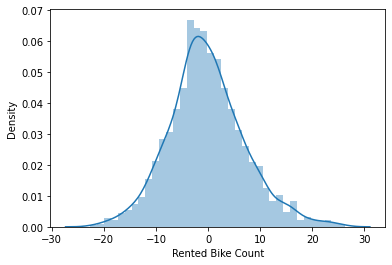

In [144]:
y_pred=lasso.predict(X_test)
residual=y_test-y_pred
sns.distplot(residual)

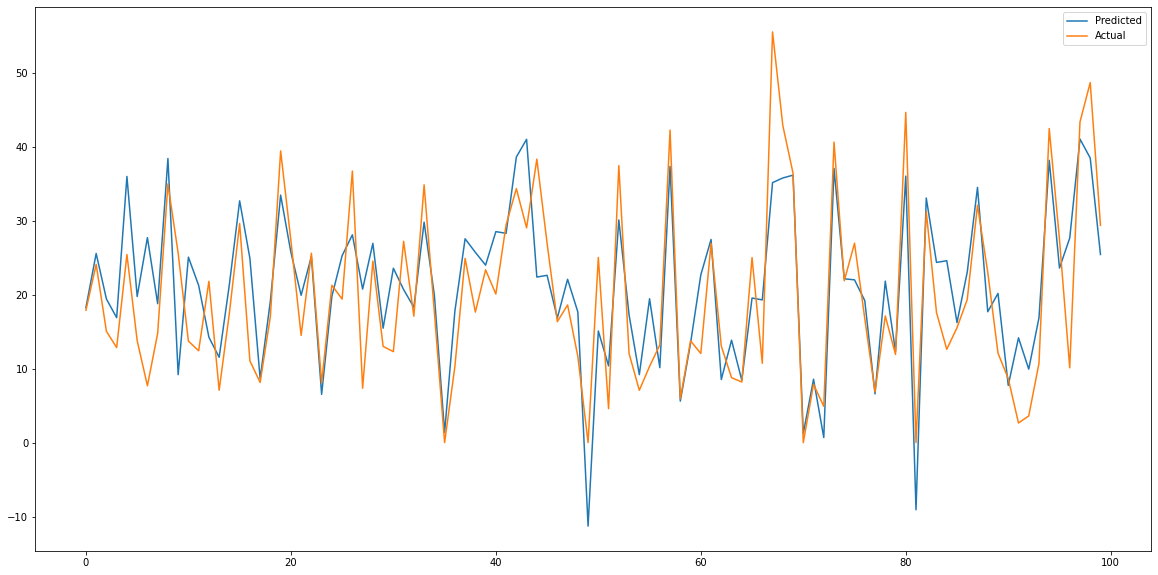

In [145]:
# ploting the line graph of actual and predicted values
  
plot_(y_test,y_pred)

#Elastic net regression

In [146]:
'''it is combination of ridge regression and lasso regression in a certain ratio'''
#initializing and creating instance
from sklearn.linear_model import ElasticNet
eln=ElasticNet()

In [147]:
#finding the best parameter
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(eln, parameters, scoring='neg_mean_squared_error',cv=5)

In [148]:
#fitting model
elastic_grid.fit(X_train,y_train)
L=elastic_grid.best_estimator_
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

{'alpha': 0.001, 'l1_ratio': 0.5}
-54.191439290893676


In [149]:
#fITTING ELASTIC NET REGRESSION WITH BEST PARAMETER
elnet = ElasticNet(alpha=0.001, l1_ratio=0.5)
score_elastic=LR_model(elnet,X_train,X_test,y_train,y_test)

coefficients: [ 3.3135916   6.63018875 -3.14475934  0.06467763  0.23699613 -0.80713033
 -1.69929041  0.01755941 -2.25397653  0.68398534  4.94724762  0.40575912
 -0.3519622 ]
intercept: 23.534127039443128
MSE: 175126.30600662378
RMSE : 418.48095058989696
R2 : 0.5801433365265165
MAE : 280.597266209753
adj_r2 : 0.5776350016803974


In [150]:
score_df=score_df.append(score_elastic)
score_df

Model       MAE          MSE      RMSE      R2  Adj_R2
1       LinearRegression()  280.5766  175064.3993  418.4070  0.5803  0.5778
1           Ridge(alpha=5)  280.6016  175136.8425  418.4935  0.5801  0.5776
1       Lasso(alpha=0.001)  280.5852  175093.0432  418.4412  0.5802  0.5777
1  ElasticNet(alpha=0.001)  280.5973  175126.3060  418.4810  0.5801  0.5776

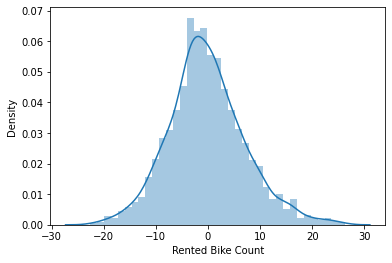

In [151]:
#distplot of residual
y_pred=elnet.predict(X_test)
residual=y_test-y_pred
sns.distplot(residual)

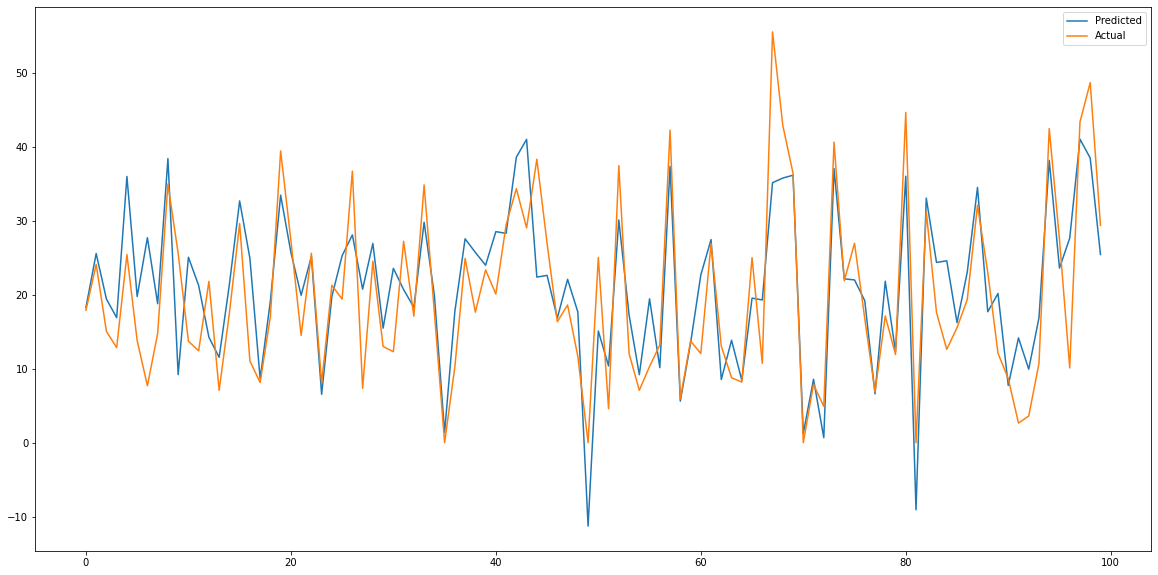

In [152]:
# ploting the line graph of actual and predicted values
plot_(y_test,y_pred)

#polynomial regression


In [153]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)  
lin2 = LinearRegression()
score_poly=LR_model(lin2,X_train,X_test,y_train,y_test)

coefficients: [ 3.83375889e-11 -8.94822509e-02  5.03622576e-01  7.30837337e-01
  4.46946582e+00  5.58962624e-04  3.12948255e+00 -2.70108150e+01
  8.73288514e+00 -1.37529007e+00 -7.23396797e+00  1.20624480e+01
  8.15422166e-02 -6.25841722e-02 -2.21999355e-03  2.34604686e-02
 -8.33750061e-03  2.22491269e-03  3.51049652e-05  1.37697448e-03
 -3.88891700e-02  8.03181725e-02 -2.79902805e-02  2.20460089e-01
  6.20125983e-01  1.19815677e-02 -1.06927480e-01 -9.09599355e-03
 -2.55409655e-03  6.44575903e-02 -1.22138321e-04 -1.50805151e-01
 -9.92317741e-02 -6.12984401e-01 -6.47889997e-02 -1.45345718e-01
  5.84032716e-01 -8.14150910e-03  1.40955790e-02 -4.76621615e-03
 -4.93056993e-02 -1.61016659e-05  3.45342006e-02  2.91896591e-01
  2.05151278e-03  4.37590320e-02  7.48541610e-02 -2.43283274e-01
  3.33747485e-03  2.08536664e-02 -1.12843615e-01 -6.76960763e-04
 -8.72214826e-01  6.09940434e-02  3.75351083e-01  1.12685028e-01
 -3.14147429e-01 -3.20074322e-01 -4.71828869e-02  6.45973264e-01
 -3.2333215

In [154]:
score_df=score_df.append(score_poly)
score_df

Model       MAE          MSE      RMSE      R2  Adj_R2
1       LinearRegression()  280.5766  175064.3993  418.4070  0.5803  0.5778
1           Ridge(alpha=5)  280.6016  175136.8425  418.4935  0.5801  0.5776
1       Lasso(alpha=0.001)  280.5852  175093.0432  418.4412  0.5802  0.5777
1  ElasticNet(alpha=0.001)  280.5973  175126.3060  418.4810  0.5801  0.5776
1       LinearRegression()  239.7518  128841.7155  358.9453  0.6842  0.6710

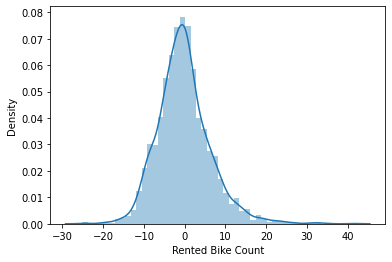

In [155]:
y_pred=lin2.predict((X_test))
residual=y_test-y_pred
sns.distplot(residual)

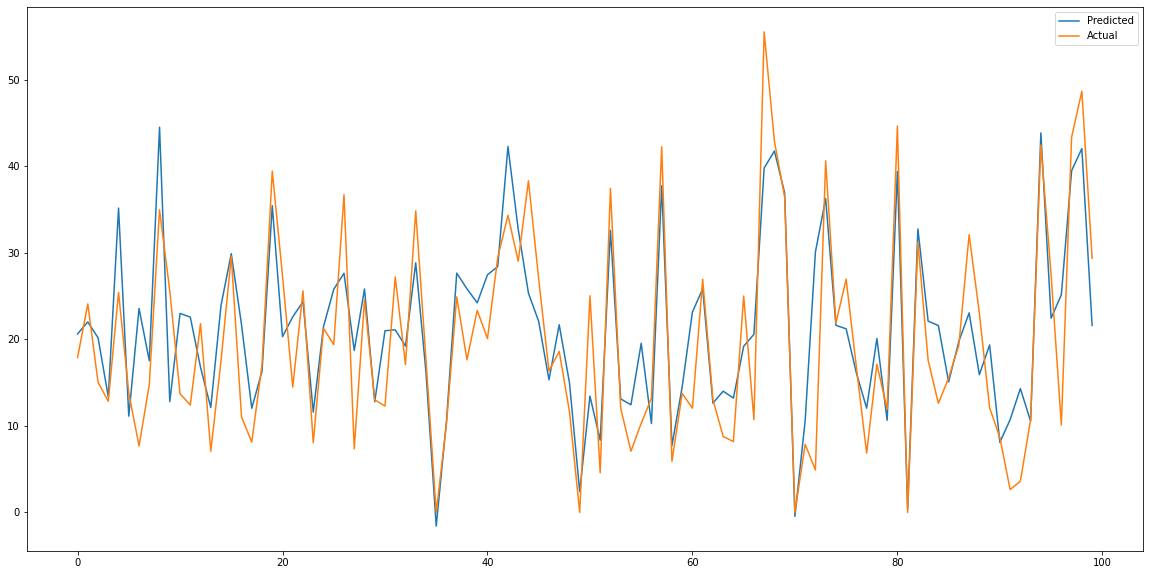

In [156]:
# ploting the line graph of actual and predicted values
plot_(y_test,y_pred)

##Train test split for other models

In [157]:
cat_col=[ 'Seasons','Holiday', 'Functioning Day']

In [158]:
# lable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    new_df[col]= le.fit_transform(new_df[col])

In [159]:
# splitting data in X and y
X = new_df.drop(columns=['Rented Bike Count'])
y =new_df['Rented Bike Count']

In [160]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
     

In [161]:
#let's see how many data values are there in my X_train,X_test,y_train,y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 13), (2190, 13), (6570,), (2190,))

In [162]:
X_train.head()

Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8639   23              3.8           83               1.1               390   
3614   14             24.0           47               2.3               520   
1387   19             -7.1           33               2.0              1887   
3900   12             12.3           97               0.8               238   
8044    4              3.6           70               0.8              1934   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
8639                     0.00           0.0            0.4        0        1   
3614                     2.87           0.0            0.0        1        1   
1387                     0.00           0.0            0.0        3        1   
3900                     0.14           2.0            0.0        1        1   
8044                     0.00           0.0            0.0        0        1   

      Functioning Day month weekdays_weekend  
8639                1    11                1  
3614                1     4                0  
1387                1     1                1  
3900                1    12                0  
8044                1     1                0

##Decision Tree

In [163]:
# importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [164]:
# parameters for Hyper Parameter tuning for Decission Tree model

parameters = {'splitter' : ["best", "random"],
              'max_depth' : [5,7,10,15,20,'none'],
              'min_samples_split': [10,50,100]}

In [165]:
#creating an instance for decision tree regressor
dtr=DecisionTreeRegressor()

#hyper parameter tuning 
dtr_grid=GridSearchCV(dtr,param_grid=parameters,cv=3,n_jobs=-1)

In [166]:
#fitting model and finding the best parameters
dtr_grid.fit(X_train,y_train)
print(dtr_grid.best_params_)
print(dtr_grid.best_score_)

{'max_depth': 20, 'min_samples_split': 50, 'splitter': 'best'}
0.8524499661264517


In [167]:
#fitting model with the best parameters
dtr=dtr_grid.best_estimator_
dtr.fit(X_train,y_train)

#predicting the y_test
y_pred = dtr.predict(X_test)

In [168]:
#function to calculate and store different matrics 
def score_cal(model,y_test,y_pred):
  mse=mean_squared_error(y_test,y_pred)
  print("Mean squared error:",mse)
  rmse=np.sqrt(mse)
  print("Root mean squared error:",rmse)
  mae=mean_absolute_error(y_test,y_pred)
  print("mean absolute error:",mae)
  R2=r2_score(y_test,y_pred)
  print("R2:",R2)
  adj_r2=(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  print("ADJUSTED R2",adj_r2)
  dict1={'Model':model,
        'MAE':round((mae),4),
       'MSE':round((mse),4),
       'RMSE':round((rmse),4),
       'R2':round((R2),4),
       'Adj_R2':round((adj_r2 ),4)
       }
  return pd.DataFrame(dict1,index=[1])

In [169]:
score_dt=score_cal(dtr,y_test,y_pred)

Mean squared error: 19.275937246861744
Root mean squared error: 4.390437022309026
mean absolute error: 3.026385036958987
R2: 0.8779744500179711
ADJUSTED R2 0.8772454370814976


In [170]:
score_df=score_df.append(score_dt)
score_df

Model       MAE          MSE  \
1                                 LinearRegression()  280.5766  175064.3993   
1                                     Ridge(alpha=5)  280.6016  175136.8425   
1                                 Lasso(alpha=0.001)  280.5852  175093.0432   
1                            ElasticNet(alpha=0.001)  280.5973  175126.3060   
1                                 LinearRegression()  239.7518  128841.7155   
1  DecisionTreeRegressor(max_depth=20, min_sample...    3.0264      19.2759   

       RMSE      R2  Adj_R2  
1  418.4070  0.5803  0.5778  
1  418.4935  0.5801  0.5776  
1  418.4412  0.5802  0.5777  
1  418.4810  0.5801  0.5776  
1  358.9453  0.6842  0.6710  
1    4.3904  0.8780  0.8772

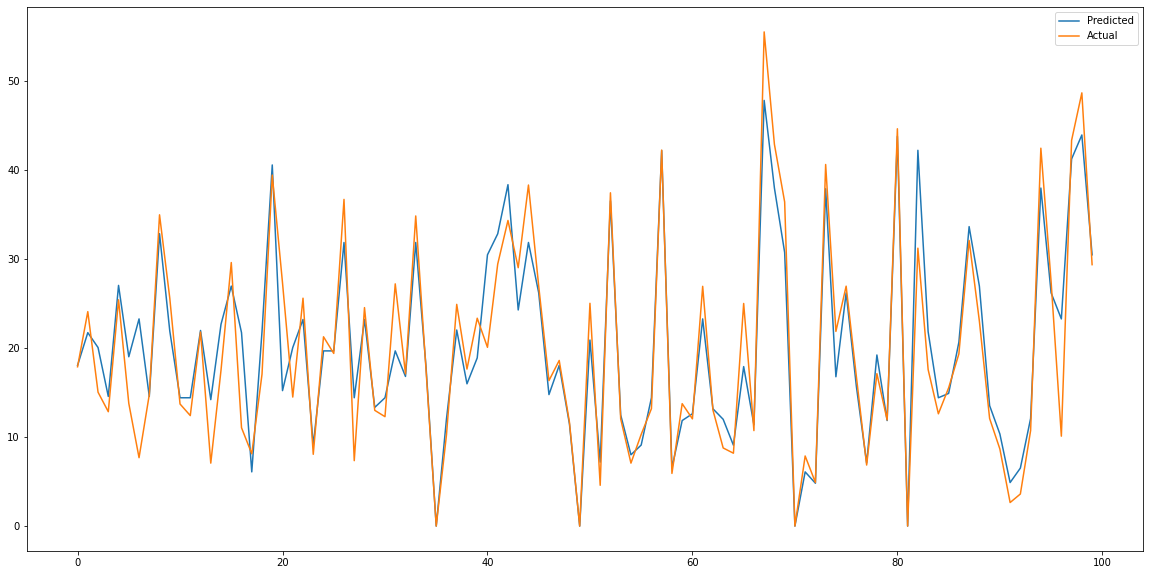

In [171]:
plot_(y_test,y_pred)

#RandomForest Regression

In [172]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()

In [173]:
# parameters for Random forest
parameters = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[12,13,14]}

In [174]:
#hyper parameter tuning
random_grid=GridSearchCV(rand_forest,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

#fitting
random_grid.fit(X_train,y_train)
#finding the best parameters
print(random_grid.best_estimator_)
print(random_grid.best_score_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
RandomForestRegressor(max_depth=25, max_features=12, min_samples_split=10)
0.9065874509888862


In [175]:
#fitting with best parameters
rfr=RandomForestRegressor(max_depth=20, max_features=13, min_samples_split=10,n_estimators=150)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=13, min_samples_split=10,
                      n_estimators=150)

In [176]:
#predicting the y_test
y_pred = rfr.predict(X_test)

In [177]:
#calculating the score
score_rfr=score_cal(dtr,y_test,y_pred)

Mean squared error: 13.512451745963821
Root mean squared error: 3.6759286916320644
mean absolute error: 2.4326339509882335
R2: 0.914459964525185
ADJUSTED R2 0.9139489257103078


In [178]:
#appending in score_df 
score_df=score_df.append(score_rfr)
score_df

Model       MAE          MSE  \
1                                 LinearRegression()  280.5766  175064.3993   
1                                     Ridge(alpha=5)  280.6016  175136.8425   
1                                 Lasso(alpha=0.001)  280.5852  175093.0432   
1                            ElasticNet(alpha=0.001)  280.5973  175126.3060   
1                                 LinearRegression()  239.7518  128841.7155   
1  DecisionTreeRegressor(max_depth=20, min_sample...    3.0264      19.2759   
1  DecisionTreeRegressor(max_depth=20, min_sample...    2.4326      13.5125   

       RMSE      R2  Adj_R2  
1  418.4070  0.5803  0.5778  
1  418.4935  0.5801  0.5776  
1  418.4412  0.5802  0.5777  
1  418.4810  0.5801  0.5776  
1  358.9453  0.6842  0.6710  
1    4.3904  0.8780  0.8772  
1    3.6759  0.9145  0.9139

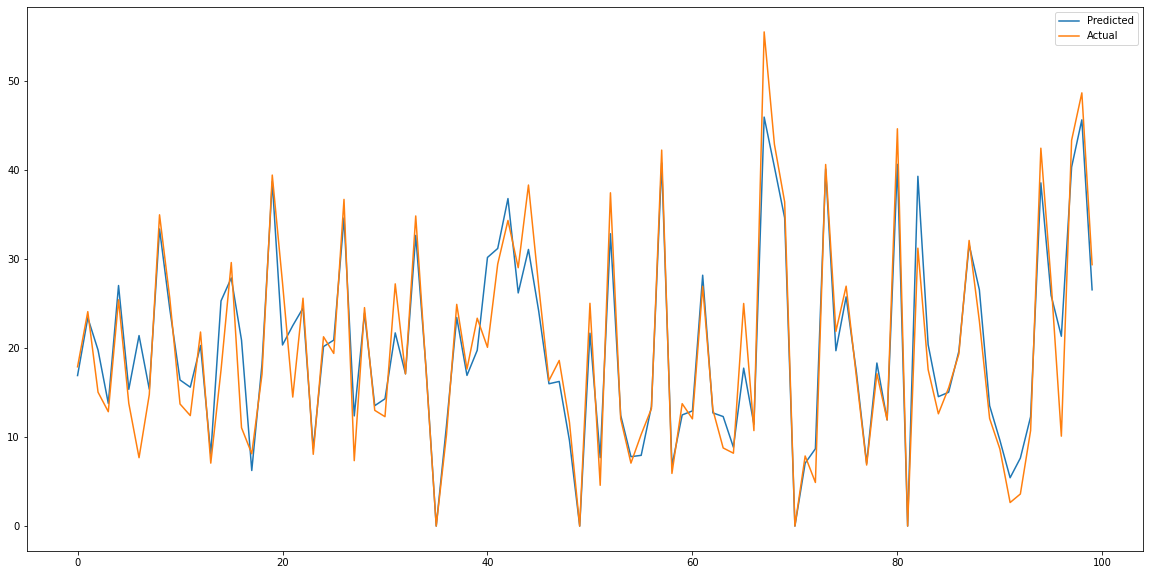

In [179]:
plot_(y_test,y_pred)